2.024094208352393


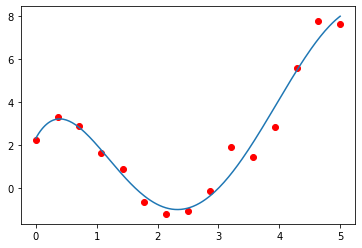

In [245]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
N = 15
x = np.transpose(np.linspace(0,5,N))
y = (x - 2) ** 2 + np.random.randn(N)
# polynomial of order k
k = 5
# compute Least Squares fit
A = []
#creating with each iteration a polynome of order i
for i in range(k+1):
    A.append(x ** (k-i))
A=np.transpose(A)
At=np.transpose(A)
#claculating the training model array
what = np.dot(np.dot(linalg.inv(np.dot(At,A)),At),y)
what

# evaluate the polynomial on evenly spaced points.

xx = np.transpose(np.linspace(0,5,200))
AA = []
#creating with each iteration a polynome of order i for the new set of points
for i in range(k+1):
    AA.append(xx ** (k-i))
AA=np.transpose(AA)
#calculate the yy result based on the model we got before
yy = AA.dot(what)
#visualisating the scattering of the previous values on the obtained 200 values 
plt.figure(1)
plt.plot(xx,yy)
plt.scatter(x,y,c='r')
#calculation the error value
err = linalg.norm(y - A.dot(what))
print(err)

In [246]:
#NO Cross validation
kmax = 5
# generate one large A matrix. We can get the matrices for particular k
# values by just picking the correct columns from this matrix.
A = []
#applying the previous method
for i in range(kmax+1):
    A.append(x ** (kmax-i))
A=np.transpose(A)
#calculating each polynomial degree error 
err = np.zeros((kmax,1))
for k in range(kmax):
    Amat = A[:,(kmax-(k+1)):(kmax+1)]
    AmatT=np.transpose(Amat)
    what = np.dot(np.dot(linalg.inv(np.dot(AmatT,Amat)),AmatT),y)
    # compute the error and divide by the number of points
    err[k] = linalg.norm(y - Amat.dot(what)) / N
err

array([[0.6073256 ],
       [0.24388231],
       [0.23491291],
       [0.13756684],
       [0.13493961]])

In [247]:
#using cross validation

T = 12
N = 15
k=5
x = np.transpose(np.linspace(0,5,N))
y = (x - 2) ** 2 + np.random.randn(N)
kmax=5
trials = 1000

# generate one large A matrix. We can get the matrices for particular k
# values by just picking the correct columns from this matrix.
A = []
for i in range(k+1):
    A.append(x ** (k-i))
A=np.transpose(A)
errcv = np.zeros((kmax,trials))
#training on each trial with a different permuation (taking randomly 12 to train on and 3 
#to test on)
for t in range(1,trials):
    r = np.random.permutation(N)
    train = r[0:T]
    test = r[T:]
    for k in range(kmax):
        #training and testing on a slice of the matrix 
        Atrain = A[train,kmax-(k+1):kmax+1]
        Atest = A[test,kmax-(k+1):kmax+1]
        ytrain = y[train]
        ytest = y[test]
        AtrainT=np.transpose(Atrain)
        what = np.dot(np.dot(linalg.inv(np.dot(AtrainT,Atrain)),AtrainT),ytrain)
        
        # compute error and divide by the number of test points
        errcv[k][t] = linalg.norm(ytest - (Atest.dot(what))) / (N - T)
avg_err_cv = np.mean(errcv,axis=1)
avg_err_cv
err

array([[0.6073256 ],
       [0.24388231],
       [0.23491291],
       [0.13756684],
       [0.13493961]])

[0.6073256  0.24388231 0.23491291 0.13756684 0.13493961]


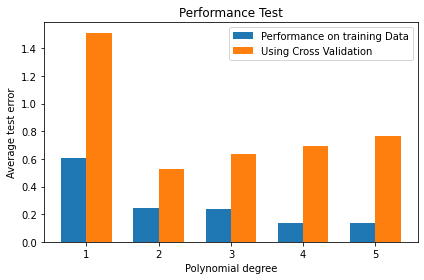

In [248]:
# compare the performance of the least-squares on training data to the
# performance when using cross-validation
errp = err[:,0]
print(errp)
labels = ['1', '2', '3', '4', '5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, errp, width, label='Performance on training Data')
rects2 = ax.bar(x + width/2, avg_err_cv, width, label='Using Cross Validation')

ax.set_ylabel('Average test error')
ax.set_xlabel('Polynomial degree')
ax.set_title('Performance Test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()